In [422]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as dt

In [423]:
from numpy import radians, sin, cos, arcsin, sqrt
def dist(a, b):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    """
    x1, y1, x2, y2 = map(radians, [a[0], a[1], b[0], b[1]])
    dx = x2 - x1
    dy = y2 - y1
    a = sin(dy/2)**2 + cos(y1) * cos(y2) * sin(dx/2)**2
    c = 2 * arcsin(sqrt(a))
    # Earth`s radius in kilometers
    km = 6372.795 * c
    return km

In [426]:
plt.style.use('classic')   # try another styles: 'classic'
plt.rcParams['figure.figsize'] = [15, 15]

srcData = "G:/1_Data1/sea/AllSea.txt"
destData = "G:/1_Data1/sea/AllSeaGisOut.txt"
obrisData = "G:/1_Data1/obris/obris.dat"
batimetrFile = "G:/1_Data1/batimetria/b2.txt"
# srcData = "~/methaneSea.dat

In [425]:
df = pd.read_csv(srcData,
                 header=0,
                 # skip_blank_lines=True,
                 skipinitialspace=True,
                 na_values='--',
                 skiprows=[1,2,3,4],
                 sep='\t',
                 decimal=',',
                 # nrows=100000,
                 parse_dates=['DateTime'],
                 dayfirst=True
                 )

In [427]:
df.shape

(316393, 14)

In [428]:
df.dropna(axis='index', subset=['Longitude', 'Latitude', 'cCH4Wtr'], inplace=True)
df.shape

(196449, 14)

In [429]:
df['year'] = df['DateTime'].dt.year

In [430]:
df.reset_index(drop=True, inplace=True)
df

,DateTime,Longitude,Latitude,Tair,Pair,Twater,pCO2Air,pCH4Air,pCO2Wtr,pCH4Wtr,dpCO2,dpCH4,cCO2Wtr,cCH4Wtr,year
0,2013-05-29 00:39:44,104.366131,51.708487,NaN,NaN,3.00,402.451705,NaN,NaN,2.504781,60.289991,0.603781,1.385356,127.989802,2013
1,2013-05-29 00:40:44,104.362324,51.708268,NaN,NaN,3.00,402.451719,NaN,464.38,2.535802,60.248037,0.634802,1.385231,129.574907,2013
2,2013-05-29 00:41:44,104.358530,51.708036,NaN,NaN,3.00,402.451733,NaN,NaN,2.550802,59.989115,0.649802,1.384456,130.341379,2013
3,2013-05-29 00:42:44,104.354780,51.707805,NaN,NaN,3.00,402.451746,NaN,NaN,2.573312,59.730192,0.672312,1.383680,131.491625,2013
4,2013-05-29 00:43:44,104.351019,51.707532,NaN,NaN,3.00,402.451760,NaN,NaN,2.597823,59.471269,0.696823,1.382905,132.744063,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196444,2022-06-14 03:39:00,105.522583,51.877233,10.09,95637.9,3.94,405.561965,1.980207,NaN,1.640952,NaN,-0.339255,NaN,60.261618,2022
196445,2022-06-14 03:39:10,105.522024,51.877118,10.17,95640.6,3.94,405.573414,1.980263,NaN,2.042323,NaN,0.062059,NaN,75.001369,2022
196446,2022-06-14 03:39:20,105.521411,51.877003,10.24,95638.2,3.94,405.563237,1.980213,NaN,1.466465,NaN,-0.513748,NaN,53.853841,2022
196447,2022-06-14 03:39:30,105.520776,51.876936,10.32,95638.4,3.94,405.564085,1.980217,NaN,1.323807,NaN,-0.656411,NaN,48.614907,2022


In [431]:
for yr in range(2013, 2024):
    t = df.loc[(df['year'] == yr) & df['cCH4Wtr']].shape
    print(f'{yr}: {t[0]}')

2013: 11610
2014: 0
2015: 0
2016: 72915
2017: 15972
2018: 30267
2019: 0
2020: 0
2021: 32634
2022: 33051
2023: 0


In [432]:
obris = pd.read_csv(obrisData,
                    header=0,
                    na_values='--',
                    sep='\t',
                    decimal=',',
                    )
obris.head(3)

,i,long,lat
0,1,NaN,NaN
1,2,109.004,53.667
2,3,109.008,53.665


In [434]:
batlegend = pd.read_csv(batimetrFile,
                         nrows=6,
                         decimal='.',
                         sep='\s+',
                         index_col=0,
                         header=None,
                        )
batlegend= batlegend.T
na_val = batlegend['nodata_value']

In [435]:
batimetria = pd.read_csv(batimetrFile,
                         skiprows=6,
                         decimal='.',
                         sep='\s+',
                         na_values=na_val,
                         index_col=False,
                         header=None,
                        )

# batimetria.dtypes\
xllcorner = batlegend.loc[1, 'xllcorner']
yllcorner = batlegend.loc[1, 'yllcorner']
cellsize = batlegend.loc[1, 'cellsize']

In [436]:
batimetria

,0,1,2,3,4,5,6,7,8,9,...,3883,3884,3885,3886,3887,3888,3889,3890,3891,3892
0,92.576,92.576,92.576,92.960,93.494,94.028,94.562,95.096,96.828,104.915,...,385.934,371.833,364.275,356.717,349.158,341.600,334.042,331.500,331.500,331.500
1,92.576,92.576,92.576,92.960,93.494,94.028,94.562,95.096,96.828,104.915,...,385.934,371.833,364.275,356.717,349.158,341.600,334.042,331.500,331.500,331.500
2,95.816,95.816,95.816,95.763,95.689,95.615,95.540,95.466,96.657,104.557,...,379.451,367.520,360.500,353.480,346.460,339.439,332.419,330.058,330.058,330.058
3,102.096,102.096,102.096,101.194,99.942,98.689,97.437,96.184,96.326,103.863,...,366.890,359.164,353.186,347.208,341.230,335.252,329.275,327.264,327.264,327.264
4,108.375,108.375,108.375,106.626,104.195,101.764,99.333,96.902,95.995,103.170,...,354.328,350.808,345.872,340.937,336.001,331.066,326.130,324.471,324.471,324.471
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2772,1430.183,1430.183,1430.183,1433.935,1439.149,1444.363,1449.577,1454.791,1457.663,1448.120,...,469.518,462.119,459.861,457.602,455.344,453.085,450.827,450.067,450.067,450.067
2773,1383.032,1383.032,1383.032,1386.262,1390.751,1395.240,1399.729,1404.218,1406.653,1398.197,...,462.400,457.240,455.797,454.355,452.912,451.470,450.027,449.542,449.542,449.542
2774,1335.882,1335.882,1335.882,1338.590,1342.354,1346.117,1349.881,1353.645,1355.642,1348.274,...,455.282,452.361,451.734,451.108,450.481,449.854,449.227,449.016,449.016,449.016
2775,1289.576,1289.576,1289.576,1291.771,1294.823,1297.875,1300.926,1303.978,1305.545,1299.246,...,448.291,447.570,447.744,447.918,448.093,448.267,448.441,448.500,448.500,448.500


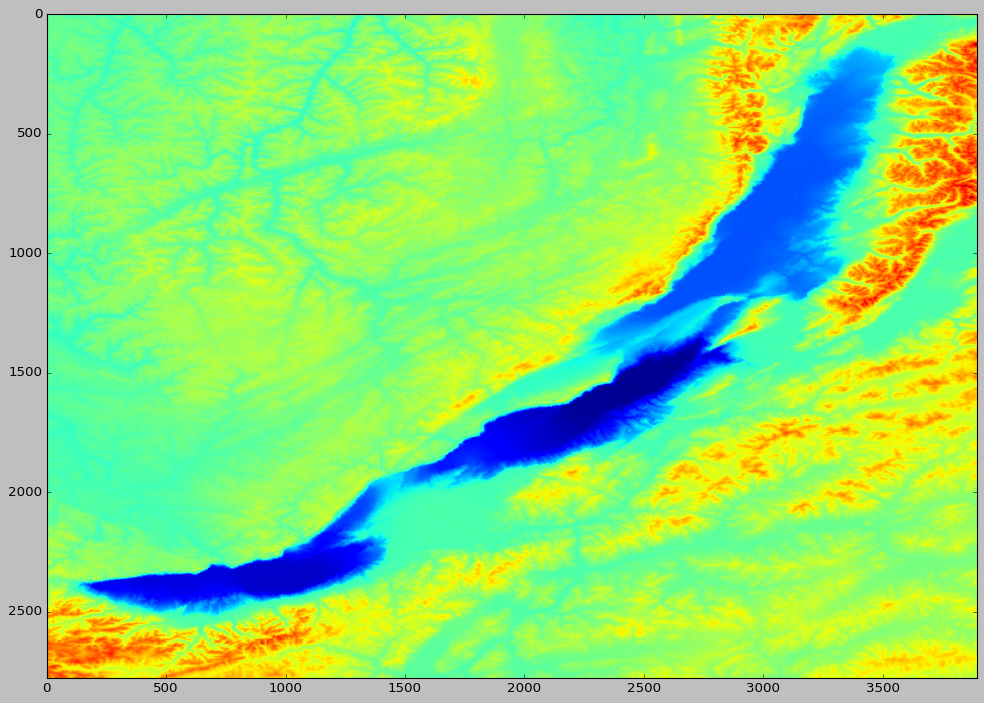

In [437]:
plt.imshow(batimetria)

In [438]:
#df['depth'] = batimetria.iloc[((df['Latitude'] - yllcorner) / cellsize).astype('int32'),((df['Longitude'] - xllcorner) / cellsize).astype('int32')]
yllcorner_m = yllcorner + batimetria.shape[0] * cellsize
yllcorner_m

55.99940106775255

In [439]:
df['batiy'] = ((yllcorner_m - df['Latitude']) / cellsize).astype('int32')
df['batix'] = ((df['Longitude'] - xllcorner) / cellsize).astype('int32')
df

,DateTime,Longitude,Latitude,Tair,Pair,Twater,pCO2Air,pCH4Air,pCO2Wtr,pCH4Wtr,dpCO2,dpCH4,cCO2Wtr,cCH4Wtr,year,batiy,batix
0,2013-05-29 00:39:44,104.366131,51.708487,NaN,NaN,3.00,402.451705,NaN,NaN,2.504781,60.289991,0.603781,1.385356,127.989802,2013,2384,484
1,2013-05-29 00:40:44,104.362324,51.708268,NaN,NaN,3.00,402.451719,NaN,464.38,2.535802,60.248037,0.634802,1.385231,129.574907,2013,2384,481
2,2013-05-29 00:41:44,104.358530,51.708036,NaN,NaN,3.00,402.451733,NaN,NaN,2.550802,59.989115,0.649802,1.384456,130.341379,2013,2384,479
3,2013-05-29 00:42:44,104.354780,51.707805,NaN,NaN,3.00,402.451746,NaN,NaN,2.573312,59.730192,0.672312,1.383680,131.491625,2013,2384,477
4,2013-05-29 00:43:44,104.351019,51.707532,NaN,NaN,3.00,402.451760,NaN,NaN,2.597823,59.471269,0.696823,1.382905,132.744063,2013,2384,475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196444,2022-06-14 03:39:00,105.522583,51.877233,10.09,95637.9,3.94,405.561965,1.980207,NaN,1.640952,NaN,-0.339255,NaN,60.261618,2022,2290,1126
196445,2022-06-14 03:39:10,105.522024,51.877118,10.17,95640.6,3.94,405.573414,1.980263,NaN,2.042323,NaN,0.062059,NaN,75.001369,2022,2290,1126
196446,2022-06-14 03:39:20,105.521411,51.877003,10.24,95638.2,3.94,405.563237,1.980213,NaN,1.466465,NaN,-0.513748,NaN,53.853841,2022,2290,1125
196447,2022-06-14 03:39:30,105.520776,51.876936,10.32,95638.4,3.94,405.564085,1.980217,NaN,1.323807,NaN,-0.656411,NaN,48.614907,2022,2290,1125


In [440]:
#df = (pd.merge(df, batimetria.stack().rename("depth"), left_on=["batiy", "batix"], right_index=True, how="left"))
df['depth'] = batimetria.to_numpy()[df['batiy'], df['batix']]
df

,DateTime,Longitude,Latitude,Tair,Pair,Twater,pCO2Air,pCH4Air,pCO2Wtr,pCH4Wtr,dpCO2,dpCH4,cCO2Wtr,cCH4Wtr,year,batiy,batix,depth
0,2013-05-29 00:39:44,104.366131,51.708487,NaN,NaN,3.00,402.451705,NaN,NaN,2.504781,60.289991,0.603781,1.385356,127.989802,2013,2384,484,-1338.163
1,2013-05-29 00:40:44,104.362324,51.708268,NaN,NaN,3.00,402.451719,NaN,464.38,2.535802,60.248037,0.634802,1.385231,129.574907,2013,2384,481,-1338.030
2,2013-05-29 00:41:44,104.358530,51.708036,NaN,NaN,3.00,402.451733,NaN,NaN,2.550802,59.989115,0.649802,1.384456,130.341379,2013,2384,479,-1339.035
3,2013-05-29 00:42:44,104.354780,51.707805,NaN,NaN,3.00,402.451746,NaN,NaN,2.573312,59.730192,0.672312,1.383680,131.491625,2013,2384,477,-1340.389
4,2013-05-29 00:43:44,104.351019,51.707532,NaN,NaN,3.00,402.451760,NaN,NaN,2.597823,59.471269,0.696823,1.382905,132.744063,2013,2384,475,-1341.743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196444,2022-06-14 03:39:00,105.522583,51.877233,10.09,95637.9,3.94,405.561965,1.980207,NaN,1.640952,NaN,-0.339255,NaN,60.261618,2022,2290,1126,-1405.999
196445,2022-06-14 03:39:10,105.522024,51.877118,10.17,95640.6,3.94,405.573414,1.980263,NaN,2.042323,NaN,0.062059,NaN,75.001369,2022,2290,1126,-1405.999
196446,2022-06-14 03:39:20,105.521411,51.877003,10.24,95638.2,3.94,405.563237,1.980213,NaN,1.466465,NaN,-0.513748,NaN,53.853841,2022,2290,1125,-1406.990
196447,2022-06-14 03:39:30,105.520776,51.876936,10.32,95638.4,3.94,405.564085,1.980217,NaN,1.323807,NaN,-0.656411,NaN,48.614907,2022,2290,1125,-1406.990


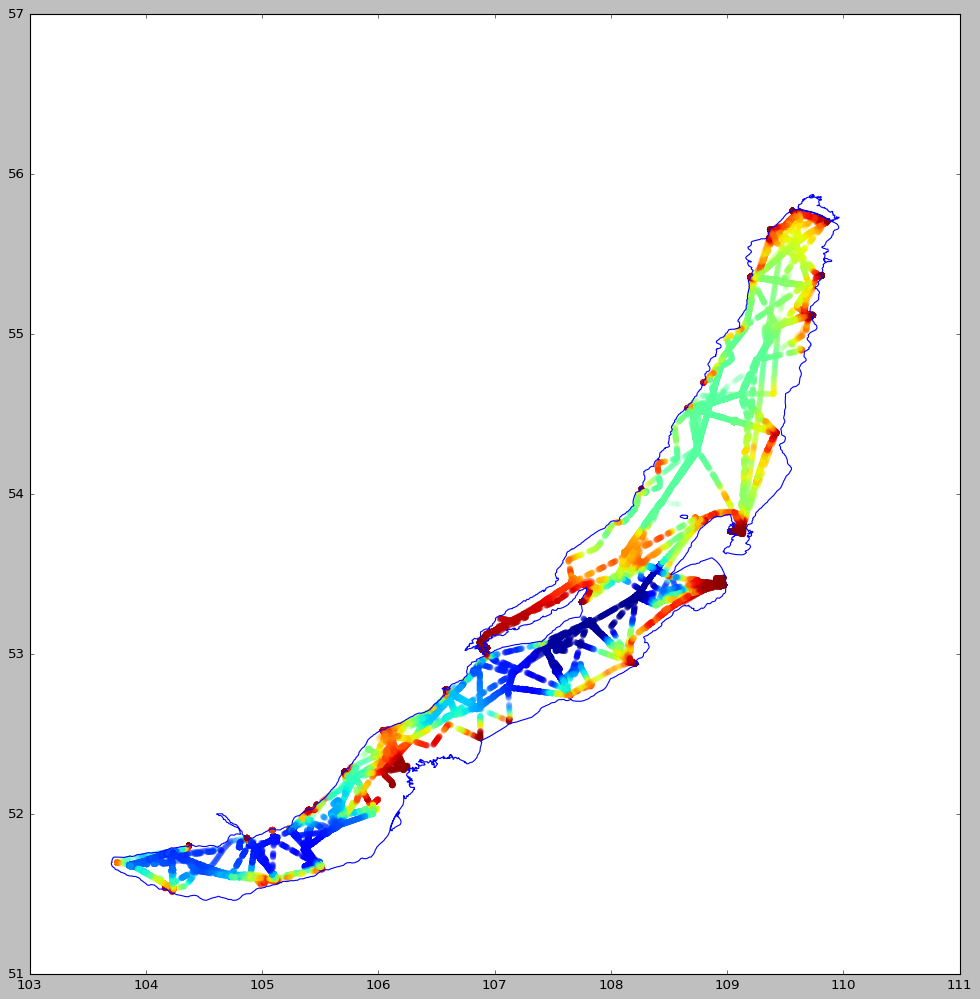

In [441]:
plt.scatter(df['Longitude'], df['Latitude'], s=30, c=df['depth'], marker='o', linewidth=0, alpha=0.1)
plt.plot(obris['long'], obris['lat'], 'b-')

In [442]:
longStep = 0.01
latStep = 0.005

df['long'] = (df['Longitude']/longStep).round()*longStep
df['lat'] = (df['Latitude']/latStep).round()*latStep
df['year'] = df['DateTime'].dt.year

In [443]:
#func_list = ['mean', 'count']
func_list = ['mean']
cols_to_calc = {'pCO2Wtr': func_list,
                'pCH4Wtr': func_list,
                'cCO2Wtr': func_list,
                'cCH4Wtr': func_list,
                'dpCO2': func_list,
                'dpCH4': func_list,
                'pCO2Air': func_list,
                'pCH4Air': func_list,
                'depth': ['mean']}
res = df.groupby(['year', 'long', 'lat'], as_index=False).agg(cols_to_calc)
res

,year,long,lat,pCO2Wtr,pCH4Wtr,cCO2Wtr,cCH4Wtr,dpCO2,dpCH4,pCO2Air,pCH4Air,depth
,,,,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,2013,103.87,51.675,NaN,4.654861,1.491574,237.854988,95.766731,2.753861,402.454329,NaN,-1269.565000
1,2013,103.87,51.680,507.115714,2.708472,1.499452,138.398024,98.398342,0.807472,402.453943,NaN,-1284.955205
2,2013,103.88,51.675,NaN,2.732152,1.490233,139.608043,95.318789,0.831152,402.454397,NaN,-1264.235200
3,2013,103.88,51.680,450.450000,2.842351,1.405484,145.239035,67.011249,0.941351,402.453470,NaN,-1280.236500
4,2013,103.89,51.670,489.270000,2.632693,1.488759,134.525851,94.826053,0.731693,402.454473,NaN,-1223.079000
...,...,...,...,...,...,...,...,...,...,...,...,...
16974,2022,109.84,55.690,321.207704,43.281066,0.931341,1580.608244,-78.617301,41.354844,399.825005,1.926221,-228.817167
16975,2022,109.84,55.695,339.995510,40.455555,0.986688,1478.510366,-59.880455,38.529078,399.875966,1.926477,-180.305000
16976,2022,109.85,55.695,341.643514,42.992854,0.981568,1557.709998,-58.237455,41.066350,399.880969,1.926505,-166.123500


In [444]:
for yr in range(2013, 2024):
    t = res.loc[res['year'] == yr].shape
    print(f'{yr}: {t[0]}')

2013: 2485
2014: 0
2015: 0
2016: 2554
2017: 3066
2018: 2896
2019: 0
2020: 0
2021: 2656
2022: 3322
2023: 0


In [445]:
func_list = ['mean', 'std', 'count']

cols_to_calc = {('cCH4Wtr', 'mean'): func_list,
                ('depth', 'mean'): func_list,
               }
res = res.groupby(['long', 'lat'], as_index=False).agg(cols_to_calc)
res

long     lat      cCH4Wtr                          depth             \
                              mean                           mean              
                              mean          std count        mean        std   
0      103.75  51.695   120.548499          NaN     1 -402.891381        NaN   
1      103.76  51.690   123.197871          NaN     1 -342.279577        NaN   
2      103.76  51.695   114.449653          NaN     1 -359.879286        NaN   
3      103.77  51.690   119.207194          NaN     1 -363.203000        NaN   
4      103.77  51.695   107.322251          NaN     1 -389.979000        NaN   
...       ...     ...          ...          ...   ...         ...        ...   
12095  109.85  55.695   744.878953   566.468133     4 -151.698352  15.868077   
12096  109.85  55.700  2502.306512  3206.961849     3 -114.002238  19.275200   
12097  109.86  55.695   567.232920          NaN     1 -152.089091        NaN   
12098  109.86  55.700  9439.994097  3405.365379     2  -56.176227  16.294792   
12099  109.86  55.705  9448.638860  8006.925965     2  -22.808000   3.744838   

             
             
      count  
0         1  
1         1  
2         1  
3         1  
4         1  
...     ...  
12095     4  
12096     3  
12097     1  
12098     2  
12099     2  

[12100 rows x 8 columns]

In [446]:
res.to_csv(destData,
           sep='\t',
           )

C:\Users\pestu\AppData\Local\Temp\ipykernel_13440\444436291.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  valMax = res[('cCH4Wtr','mean')].max


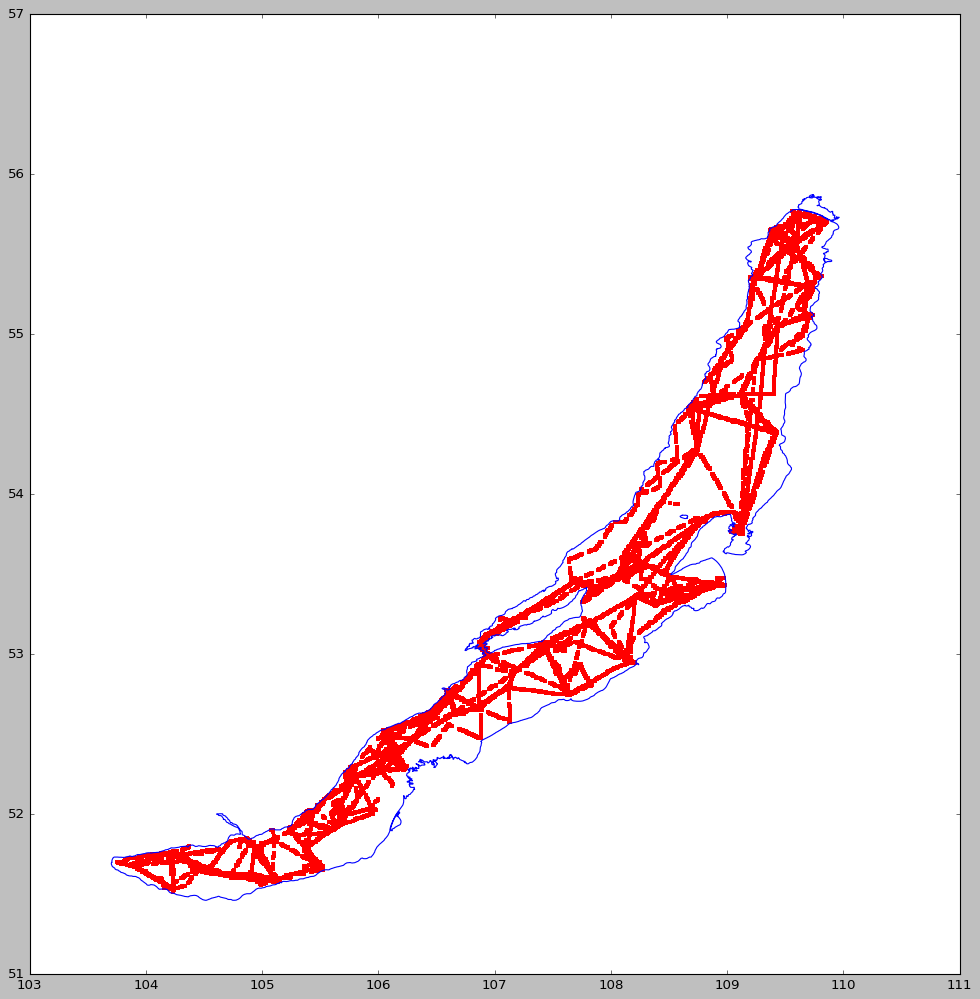

In [447]:
%matplotlib inline
valMax = res[('cCH4Wtr','mean')].max

fig = plt.figure()

# wether this or those
plt.scatter(res['long'], res['lat'], c='r', s=10, marker='s', linewidth=0)
plt.plot(obris['long'], obris['lat'], 'b-')

fig.savefig('gis.png')